In [2]:
import pandas as pd
import numpy as np
import requests

# contest.list

Returns information about all available contests.

### Parameter	Description
gym	Boolean. If true — than gym contests are returned. Otherwide, regular contests are returned.
Return value: Returns a list of Contest objects. If this method is called not anonymously, then all available contests for a calling user will be returned too, including mashups and private gyms.

In [3]:
contest_list=requests.get("https://codeforces.com/api/contest.list?").json()
contest_list=pd.DataFrame(contest_list['result'])
contest_list

,id,name,type,phase,frozen,durationSeconds,startTimeSeconds,relativeTimeSeconds
0,1827,Codeforces Round (Div. 1),CF,BEFORE,False,7200,1684074900,-940360
1,1828,Codeforces Round (Div. 2),CF,BEFORE,False,7200,1684074900,-940360
2,1832,Educational Codeforces Round 148 (Rated for Di...,ICPC,BEFORE,False,7200,1683902100,-767560
3,1824,Codeforces Round (Div. 1),CF,BEFORE,False,7200,1683547500,-412960
4,1825,Codeforces Round (Div. 2),CF,BEFORE,False,7200,1683547500,-412960
...,...,...,...,...,...,...,...,...
1734,5,Codeforces Beta Round 5,ICPC,FINISHED,False,7200,1269100800,414033740
1735,4,Codeforces Beta Round 4 (Div. 2 Only),ICPC,FINISHED,False,7200,1268395200,414739340
1736,3,Codeforces Beta Round 3,ICPC,FINISHED,False,7200,1267963200,415171338
1737,2,Codeforces Beta Round 2,ICPC,FINISHED,False,7200,1267117200,416017340


# contest.ratingChanges
Returns rating changes after the contest.

## Parameter	Description
contestId (Required)	Id of the contest. It is not the round number. It can be seen in contest URL.   
For example: /contest/566/status
Return value: Returns a list of RatingChange objects.  

Example: https://codeforces.com/api/contest.ratingChanges?contestId=566

Note: 760*1737 *1141= 1.5 GB

In [4]:
ratingChanges=requests.get("https://codeforces.com/api/contest.ratingChanges?contestId=566").json()
ratingChanges=pd.DataFrame(ratingChanges['result'])
ratingChanges

,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
0,566,"VK Cup 2015 - Finals, online mirror",rng_58,1,1438284000,2849,2941
1,566,"VK Cup 2015 - Finals, online mirror",ngfam_kongu,2,1438284000,2294,2383
2,566,"VK Cup 2015 - Finals, online mirror",I_love_Hoang_Yen,2,1438284000,2498,2587
3,566,"VK Cup 2015 - Finals, online mirror",KFDong,3,1438284000,2138,2224
4,566,"VK Cup 2015 - Finals, online mirror",zld3794955,3,1438284000,2409,2495
...,...,...,...,...,...,...,...
756,566,"VK Cup 2015 - Finals, online mirror",coder222,619,1438284000,1335,1288
757,566,"VK Cup 2015 - Finals, online mirror",Mohtasim,622,1438284000,1534,1472
758,566,"VK Cup 2015 - Finals, online mirror",filename,623,1438284000,1324,1277
759,566,"VK Cup 2015 - Finals, online mirror",colin_ni,624,1438284000,1553,1490


## contest.standings

Returns the description of the contest and the requested part of the standings.

Parameter	Description  
contestId (Required)	Id of the contest. It is not the round number. It can be seen in contest URL. For example: /contest/566/status  
from	1-based index of the standings row to start the ranklist.  
count	Number of standing rows to return.  
handles	Semicolon-separated list of handles. No more than 10000 handles is accepted.  
room	If specified, than only participants from this room will be shown in the result. If not — all the participants will be shown.  
showUnofficial	If true than all participants (virtual, out of competition) are shown. Otherwise, only official contestants are shown.  
Return value: Returns object with three fields: "contest", "problems" and "rows".   
Field "contest" contains a Contest object.   
Field "problems" contains a list of Problem objects. Field "rows" contains a list of RanklistRow objects.

In [5]:
standings=requests.get("https://codeforces.com/api/contest.standings?contestId=566&showUnofficial=true").json()
standings_problems=pd.DataFrame(standings['result']['problems'])
standings_problems

,contestId,index,name,type,points,rating,tags
0,566,A,Matching Names,PROGRAMMING,1750.0,2300,"[dfs and similar, strings, trees]"
1,566,B,Replicating Processes,PROGRAMMING,2500.0,2600,"[constructive algorithms, greedy]"
2,566,C,Logistical Questions,PROGRAMMING,3000.0,3000,"[dfs and similar, divide and conquer, trees]"
3,566,D,Restructuring Company,PROGRAMMING,1000.0,1900,"[data structures, dsu]"
4,566,E,Restoring Map,PROGRAMMING,3000.0,3200,"[bitmasks, constructive algorithms, trees]"
5,566,F,Clique in the Divisibility Graph,PROGRAMMING,500.0,1500,"[dp, math, number theory]"
6,566,G,Max and Min,PROGRAMMING,2500.0,2500,[geometry]


In [6]:
standings_rows=pd.DataFrame(standings['result']['rows'])
standings_rows

,party,rank,points,penalty,successfulHackCount,unsuccessfulHackCount,problemResults
0,"{'contestId': 566, 'members': [{'handle': 'mar...",1,8238.0,0,0,0,"[{'points': 1582.0, 'rejectedAttemptCount': 0,..."
1,"{'contestId': 566, 'members': [{'handle': 'rng...",2,7974.0,0,1,0,"[{'points': 1330.0, 'rejectedAttemptCount': 0,..."
2,"{'contestId': 566, 'members': [{'handle': 'hog...",3,7048.0,0,0,0,"[{'points': 1162.0, 'rejectedAttemptCount': 0,..."
3,"{'contestId': 566, 'members': [{'handle': 'ngf...",4,6011.0,0,3,1,"[{'points': 1267.0, 'rejectedAttemptCount': 0,..."
4,"{'contestId': 566, 'members': [{'handle': 'ste...",5,5872.0,0,0,0,"[{'points': 1568.0, 'rejectedAttemptCount': 0,..."
...,...,...,...,...,...,...,...
6055,"{'contestId': 566, 'members': [{'handle': 'yin...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6056,"{'contestId': 566, 'members': [{'handle': 'WII...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6057,"{'contestId': 566, 'members': [{'handle': 'dmi...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6058,"{'contestId': 566, 'members': [{'handle': 'ser...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."


In [7]:
standings_party=pd.DataFrame(standings['result']['rows'][0]['party'])
standings_party

,contestId,members,participantType,ghost,startTimeSeconds
0,566,{'handle': 'maroonrk'},VIRTUAL,False,1621605600


The points to each problem

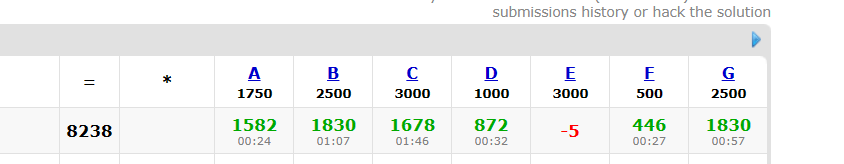

In [8]:
standings=requests.get("https://codeforces.com/api/contest.standings?contestId=566&showUnofficial=true").json()
standings_problems_results=pd.DataFrame(standings['result']['rows'][0]['problemResults'])
standings_problems_results

,points,rejectedAttemptCount,type,bestSubmissionTimeSeconds
0,1582.0,0,FINAL,1476.0
1,1830.0,0,FINAL,4078.0
2,1678.0,1,FINAL,6412.0
3,872.0,0,FINAL,1953.0
4,0.0,5,FINAL,NaN
5,446.0,0,FINAL,1665.0
6,1830.0,2,FINAL,3445.0


## contest.status
Returns submissions for specified contest. Optionally can return submissions of specified user.  

Parameter	Description  
contestId (Required)	Id of the contest. It is not the round number. It can be seen in contest URL. For example: /contest/566/status  
handle	Codeforces user handle.  
from	1-based index of the first submission to return.  
count	Number of returned submissions.  
Return value: Returns a list of Submission objects, sorted in decreasing order of submission id.  

Example: https://codeforces.com/api/contest.status?contestId=566&from=1&count=10

## problemset.problems
Returns all problems from problemset. Problems can be filtered by tags.  

Parameter	Description  
tags	Semicilon-separated list of tags.  
problemsetName	Custom problemset's short name, like 'acmsguru'  
Return value: Returns two lists. List of Problem objects and list of ProblemStatistics objects.  

Example: https://codeforces.com/api/problemset.problems?tags=implementation

In [9]:
problem_data=requests.get("https://codeforces.com/api/problemset.problems?").json()
problem_data=pd.DataFrame(problem_data['result']['problems'])
problem_data

,contestId,index,name,type,points,rating,tags
0,1823,F,Random Walk,PROGRAMMING,2500.0,2600.0,"[dp, graphs, math, probabilities, trees]"
1,1823,E,Removing Graph,PROGRAMMING,2000.0,2500.0,"[brute force, dp, games, graphs, math]"
2,1823,D,Unique Palindromes,PROGRAMMING,2000.0,1900.0,"[constructive algorithms, math, strings]"
3,1823,C,Strongly Composite,PROGRAMMING,1250.0,1300.0,"[greedy, math, number theory]"
4,1823,B,Sort with Step,PROGRAMMING,1000.0,900.0,"[brute force, math, sortings]"
...,...,...,...,...,...,...,...
8622,2,B,The least round way,PROGRAMMING,NaN,2000.0,"[dp, math]"
8623,2,A,Winner,PROGRAMMING,NaN,1500.0,"[hashing, implementation]"
8624,1,C,Ancient Berland Circus,PROGRAMMING,NaN,2100.0,"[geometry, math]"
8625,1,B,Spreadsheet,PROGRAMMING,NaN,1600.0,"[implementation, math]"


In [10]:
problems=requests.get("https://codeforces.com/api/problemset.problems?").json()
problems=pd.DataFrame(problems['result']['problems'])
problems

,contestId,index,name,type,points,rating,tags
0,1823,F,Random Walk,PROGRAMMING,2500.0,2600.0,"[dp, graphs, math, probabilities, trees]"
1,1823,E,Removing Graph,PROGRAMMING,2000.0,2500.0,"[brute force, dp, games, graphs, math]"
2,1823,D,Unique Palindromes,PROGRAMMING,2000.0,1900.0,"[constructive algorithms, math, strings]"
3,1823,C,Strongly Composite,PROGRAMMING,1250.0,1300.0,"[greedy, math, number theory]"
4,1823,B,Sort with Step,PROGRAMMING,1000.0,900.0,"[brute force, math, sortings]"
...,...,...,...,...,...,...,...
8622,2,B,The least round way,PROGRAMMING,NaN,2000.0,"[dp, math]"
8623,2,A,Winner,PROGRAMMING,NaN,1500.0,"[hashing, implementation]"
8624,1,C,Ancient Berland Circus,PROGRAMMING,NaN,2100.0,"[geometry, math]"
8625,1,B,Spreadsheet,PROGRAMMING,NaN,1600.0,"[implementation, math]"


In [11]:
problems=requests.get("https://codeforces.com/api/problemset.problems?").json()
problemStatistics=pd.DataFrame(problems['result']['problemStatistics'])
problemStatistics

,contestId,index,solvedCount
0,1823,F,294
1,1823,E,675
2,1823,D,2000
3,1823,C,6624
4,1823,B,9380
...,...,...,...
8622,2,B,8959
8623,2,A,20992
8624,1,C,4895
8625,1,B,19101


# user.ratedList
Returns the list users who have participated in at least one rated contest.

Parameter	Description
activeOnly	Boolean. If true then only users, who participated in rated contest during the last month are returned. Otherwise, all users with at least one rated contest are returned.
includeRetired	Boolean. If true, the method returns all rated users, otherwise the method returns only users, that were online at last month.
contestId	Id of the contest. It is not the round number. It can be seen in contest URL. For example: /contest/566/status
Return value: Returns a list of User objects, sorted in decreasing order of rating.

Example: https://codeforces.com/api/user.ratedList?activeOnly=true&includeRetired=false

In [12]:
user_info=requests.get("https://codeforces.com/api/user.ratedList?activeOnly=false&includeRetired=false").json()
user_info=pd.DataFrame(user_info['result'])
user_info

,lastName,country,lastOnlineTimeSeconds,city,rating,friendOfCount,titlePhoto,handle,avatar,firstName,contribution,organization,rank,maxRating,registrationTimeSeconds,maxRank,email,vkId,openId
0,Qi,United States,1683058070,Princeton,3783,12094,https://userpic.codeforces.org/312472/title/7c...,Benq,https://userpic.codeforces.org/312472/avatar/5...,Benjamin,0,MIT,legendary grandmaster,3813,1435099979,legendary grandmaster,NaN,NaN,NaN
1,Korotkevich,Belarus,1683122432,Gomel,3662,54924,https://userpic.codeforces.org/422/title/50a27...,tourist,https://userpic.codeforces.org/422/avatar/2b5d...,Gennady,0,ITMO University,legendary grandmaster,3979,1265987288,legendary grandmaster,NaN,NaN,NaN
2,Jiang,China,1683121945,Chongqing,3614,15434,https://userpic.codeforces.org/887306/title/8a...,jiangly,https://userpic.codeforces.org/887306/avatar/f...,Lingyu,0,Jiangly Fan Club,legendary grandmaster,3859,1547985852,legendary grandmaster,NaN,NaN,NaN
3,Danilyuk,Ukraine,1683115297,Kharkiv,3509,13109,https://userpic.codeforces.org/65550/title/a5b...,Um_nik,https://userpic.codeforces.org/65550/avatar/25...,Alex,0,Um_nik Training Center,legendary grandmaster,3629,1348065816,legendary grandmaster,NaN,NaN,NaN
4,Koo,South Korea,1683104119,Daejeon,3500,2713,https://userpic.codeforces.org/210765/title/7d...,ko_osaga,https://userpic.codeforces.org/210765/avatar/5...,Jaehyun,0,KAIST,legendary grandmaster,3500,1399274936,legendary grandmaster,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111800,NaN,NaN,1680588547,NaN,-43,1,https://userpic.codeforces.org/2760410/title/b...,Bebra55,https://userpic.codeforces.org/2760410/avatar/...,NaN,0,NaN,newbie,741,1662209013,newbie,NaN,NaN,NaN
111801,wang,Taiwan,1683100307,Kaohsiung City,-46,21,https://userpic.codeforces.org/2509199/title/1...,wangba,https://userpic.codeforces.org/2509199/avatar/...,ba,0,8U,newbie,875,1648112840,newbie,NaN,NaN,NaN
111802,NaN,NaN,1683032625,NaN,-48,154,https://userpic.codeforces.org/727941/title/27...,jh05013,https://userpic.codeforces.org/727941/avatar/d...,NaN,0,NaN,newbie,1708,1523433648,expert,jhztfs@gmail.com,NaN,NaN
111803,NaN,NaN,1681281916,NaN,-51,47,https://userpic.codeforces.org/1450002/title/f...,RealRainbow_sjy,https://userpic.codeforces.org/1450002/avatar/...,StonksCF-verify,0,Explosive Vegetable Club,newbie,1364,1585231751,pupil,NaN,NaN,NaN


## user.rating  
Returns rating history of the specified user.   

Parameter	Description  
handle (Required)	Codeforces user handle.  
Return value: Returns a list of RatingChange objects for requested user.  

Example: https://codeforces.com/api/user.rating?handle=Fefer_Ivan

## user.status
Returns submissions of specified user.  

Parameter	Description  
handle (Required)	Codeforces user handle.  
from	1-based index of the first submission to return.  
count	Number of returned submissions.  
Return value: Returns a list of Submission objects, sorted in decreasing order of submission id.  

Example: https://codeforces.com/api/user.status?handle=Fefer_Ivan&from=1&count=10

In [38]:
user_sub=requests.get("https://codeforces.com/api/user.status?handle=ozymandiaass").json()
user_sub=pd.DataFrame(user_sub['result'])
user_sub

,id,contestId,creationTimeSeconds,relativeTimeSeconds,problem,author,programmingLanguage,verdict,testset,passedTestCount,timeConsumedMillis,memoryConsumedBytes
0,176387046,1742,1665857921,2147483647,"{'contestId': 1742, 'index': 'C', 'name': 'Str...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3,RUNTIME_ERROR,TESTS,0,78,2150400
1,176386874,1742,1665857858,2147483647,"{'contestId': 1742, 'index': 'C', 'name': 'Str...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,RUNTIME_ERROR,TESTS,0,77,2764800
2,176048384,1742,1665681293,2147483647,"{'contestId': 1742, 'index': 'E', 'name': 'Scu...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,TIME_LIMIT_EXCEEDED,TESTS,3,3000,28774400
3,176046211,1742,1665680725,2147483647,"{'contestId': 1742, 'index': 'E', 'name': 'Scu...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,WRONG_ANSWER,TESTS,0,46,0
4,176045992,1742,1665680679,2147483647,"{'contestId': 1742, 'index': 'E', 'name': 'Scu...","{'contestId': 1742, 'members': [{'handle': 'oz...",PyPy 3-64,WRONG_ANSWER,TESTS,0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,101501222,4,1608207321,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,4,216,0
153,101501135,4,1608207255,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,4,218,0
154,101500227,4,1608206555,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,4,186,0
155,101499990,4,1608206363,2147483647,"{'contestId': 4, 'index': 'A', 'name': 'Waterm...","{'contestId': 4, 'members': [{'handle': 'ozyma...",Python 3,WRONG_ANSWER,TESTS,1,186,0


In [26]:
user_sub=requests.get("https://codeforces.com/api/user.status?handle=Fefer_Ivan").json()
user_sub=pd.DataFrame(user_sub['result']['problem'])
user_sub.head()

TypeError: list indices must be integers or slices, not str

In [41]:
user_sub['problem'][120]

{'contestId': 231,
 'index': 'A',
 'name': 'Team',
 'type': 'PROGRAMMING',
 'points': 500.0,
 'rating': 800,
 'tags': ['brute force', 'greedy']}